In [116]:
import os
import glob
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
os.chdir("/Users/naufaln/Library/CloudStorage/OneDrive-officeapp.org/Academics-UWA/Sem 3/CITS5553/Energy-Usage-Prediction-Project/Naufal/Data/edited")

In [16]:
os.getcwd()
os.listdir()

['.DS_Store', 'aemo_wu_merged.csv', 'Processed_data.csv', 'HistoricalWeather']

In [88]:
daily_data = pd.read_csv('Processed_data.csv', index_col=[0]) 

In [89]:
daily_data.index = pd.to_datetime(daily_data.index)

/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_56694/2014564576.py:1: UserWarning: Parsing '13/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  daily_data.index = pd.to_datetime(daily_data.index)
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_56694/2014564576.py:1: UserWarning: Parsing '14/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  daily_data.index = pd.to_datetime(daily_data.index)
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_56694/2014564576.py:1: UserWarning: Parsing '15/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  daily_data.index = pd.to_datetime(daily_data.index)
/var/folders/8y/sx1zv40d5936ksjl45wfjsrc0000gn/T/ipykernel_56694/2014564576.py:1: UserWarning: Parsing '16/10/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True fo

In [75]:
daily_data.head()

,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_month,cos_month,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,95141.184,11.2,0,11.6,37.2,18.8,65,20,6.1,34.01,...,0.5,0.866025,0.433884,-0.900969,0.207912,0.978148,0.017213,0.999852,0.120537,0.992709
2009-02-01,108058.504,10.2,0,12.8,36.1,21.9,70,25,5.31,34.25,...,0.5,0.866025,-0.433884,-0.900969,0.406737,0.913545,0.034422,0.999407,0.120537,0.992709
2009-03-01,95788.860,9.4,0,11.8,34.4,20.3,79,29,5.45,34.11,...,0.5,0.866025,-0.974928,-0.222521,0.587785,0.809017,0.051620,0.998667,0.120537,0.992709
2009-04-01,93777.404,10.5,0,11.2,36.5,18.5,62,20,5.25,34.05,...,0.5,0.866025,-0.781831,0.623490,0.743145,0.669131,0.068802,0.997630,0.120537,0.992709
2009-05-01,112678.424,11.9,0,11.4,37.2,21.8,63,17,6.77,34.18,...,0.5,0.866025,0.000000,1.000000,0.866025,0.500000,0.085965,0.996298,0.239316,0.970942


In [109]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4910 entries, 2009-01-01 to 2022-08-15
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Operational Demand (MW)  4910 non-null   float64
 1   Transpiration            4910 non-null   float64
 2   Rain                     4910 non-null   float64
 3   Evaporation              4910 non-null   float64
 4   Max Temp                 4910 non-null   float64
 5   Min Temp                 4910 non-null   float64
 6   Max Hum                  4910 non-null   float64
 7   Min Hum                  4910 non-null   float64
 8   Av Wind                  4910 non-null   float64
 9   Solar Rad                4910 non-null   float64
 10  state_holiday            4910 non-null   int64  
 11  sin_month                4910 non-null   float64
 12  cos_month                4910 non-null   float64
 13  sin_Day_of_week          4910 non-null   float64
 14  cos_Da

In [84]:
cat_columns = ['Transpiration', 'Rain', 'Evaporation', 'Max Temp', 'Min Temp', 'Max Hum', 'Min Hum', 'Av Wind', 'Solar Rad']

In [106]:
daily_data.where(daily_data[cat_columns]==' ').count()

Operational Demand (MW)    0
Transpiration              0
Rain                       0
Evaporation                0
Max Temp                   0
Min Temp                   0
Max Hum                    0
Min Hum                    0
Av Wind                    0
Solar Rad                  0
state_holiday              0
sin_month                  0
cos_month                  0
sin_Day_of_week            0
cos_Day_of_week            0
sin_Day_of_month           0
cos_Day_of_month           0
sin_Day_of_year            0
cos_Day_of_year            0
sin_week_of_year           0
cos_week_of_year           0
dtype: int64

In [104]:
daily_data[cat_columns] = daily_data[cat_columns].replace(' ', None)

In [105]:
daily_data = daily_data.dropna()

In [107]:
daily_data[cat_columns] = daily_data[cat_columns].astype('float')

In [154]:
training_data = daily_data.loc[daily_data.index <= "2020-12-01"].copy()
testing_data = daily_data.loc[(daily_data.index > "2020-12-01") ].copy()

X_train = training_data.drop('Operational Demand (MW)' , axis = 1)
y_train = training_data['Operational Demand (MW)']

X_test = testing_data.drop('Operational Demand (MW)', axis = 1)
y_test = testing_data['Operational Demand (MW)']

In [155]:
reg = XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) 

[0]	validation_0-rmse:69195.43750	validation_1-rmse:69918.75781
[1]	validation_0-rmse:48694.12109	validation_1-rmse:49216.48047
[2]	validation_0-rmse:34379.83984	validation_1-rmse:34805.49219
[3]	validation_0-rmse:24412.84961	validation_1-rmse:24815.75977
[4]	validation_0-rmse:17489.64453	validation_1-rmse:17963.91992
[5]	validation_0-rmse:12735.05371	validation_1-rmse:13421.79883
[6]	validation_0-rmse:9523.20410	validation_1-rmse:10451.54981
[7]	validation_0-rmse:7402.10303	validation_1-rmse:8608.95312
[8]	validation_0-rmse:6040.87061	validation_1-rmse:7613.09619
[9]	validation_0-rmse:5186.91260	validation_1-rmse:7017.51611
[10]	validation_0-rmse:4688.46143	validation_1-rmse:6725.01465
[11]	validation_0-rmse:4370.19189	validation_1-rmse:6588.51562
[12]	validation_0-rmse:4199.85449	validation_1-rmse:6495.69043
[13]	validation_0-rmse:4043.82935	validation_1-rmse:6450.31103


/Users/naufaln/opt/miniconda3/envs/cits5508-2022/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14]	validation_0-rmse:3977.89722	validation_1-rmse:6435.11475
[15]	validation_0-rmse:3864.96753	validation_1-rmse:6405.47559
[16]	validation_0-rmse:3784.87402	validation_1-rmse:6391.49853
[17]	validation_0-rmse:3731.41162	validation_1-rmse:6405.58301
[18]	validation_0-rmse:3686.92456	validation_1-rmse:6396.19678
[19]	validation_0-rmse:3659.25562	validation_1-rmse:6393.66260
[20]	validation_0-rmse:3597.22070	validation_1-rmse:6366.81885
[21]	validation_0-rmse:3579.74194	validation_1-rmse:6375.05615
[22]	validation_0-rmse:3541.39209	validation_1-rmse:6366.88184
[23]	validation_0-rmse:3452.03223	validation_1-rmse:6340.29736
[24]	validation_0-rmse:3436.45288	validation_1-rmse:6339.60010
[25]	validation_0-rmse:3381.61743	validation_1-rmse:6332.62793
[26]	validation_0-rmse:3332.65479	validation_1-rmse:6323.56689
[27]	validation_0-rmse:3280.00513	validation_1-rmse:6322.01221
[28]	validation_0-rmse:3238.83789	validation_1-rmse:6317.49463
[29]	validation_0-rmse:3221.55078	validation_1-rmse:631

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

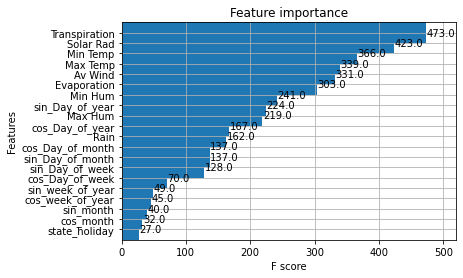

In [156]:
_ = plot_importance(reg, height=2) 

In [157]:
testing_data['MW_Prediction'] = reg.predict(X_test)

In [158]:
columns = ['Operational Demand (MW)','MW_Prediction']

df = testing_data.loc[testing_data.index < "2021-04-01"].copy()
df = df[columns]

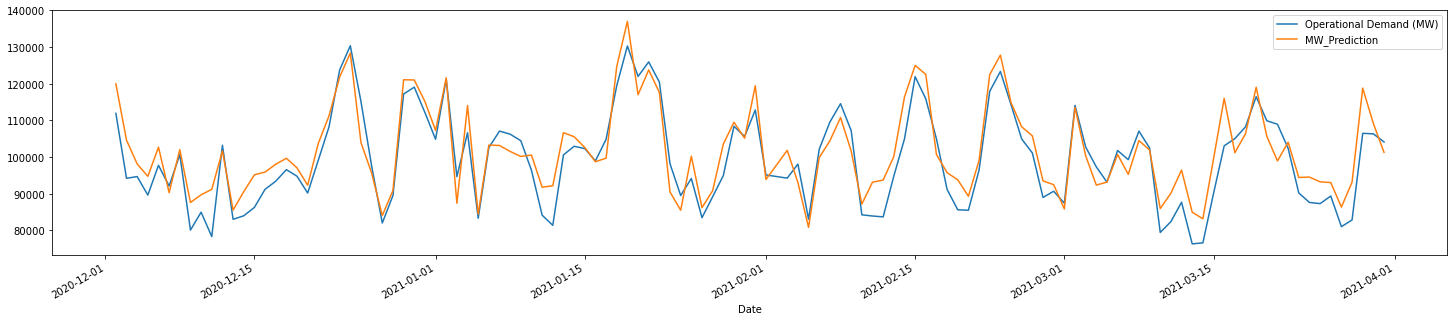

In [159]:
_ = df.plot(figsize=(25, 5))

In [ ]:
df = testing_data.loc[testing_data.index == "2021-01-20"].copy()
df = df[columns]

In [140]:
mse = mean_squared_error(y_test, testing_data['MW_Prediction'])
rmse_svm = np.sqrt(mse)
rmse_svm

6607.3440611463675